# Movie Recommendation System
- a user can enter a movie name
- the model gives recommendations similar to the movie

There are two main techniques used in recommendation system:
- content-based filtering and collaborative filtering
# Content Based :
Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.For example, if user A watched two horror movies, another horror movie will be proposed to him.
# Collaborative Filtering :
To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations. Collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Main advantage is that they learn user's embeddings automatically, without the need for hand-engineering.

In [ ]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for text processing
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# to display images
from skimage import io

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [ ]:
df = pd.read_csv('movies.csv')
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,760161,Orphan: First Kill,Horror-Thriller,en,After escaping from an Estonian psychiatric fa...,8098.027,Dark Castle Entertainment-Entertainment One-Ea...,2022-07-27,0.0,9572765.0,99.0,Released,There's always been something wrong with Esther.,6.963,821.0,Isabelle Fuhrman-Julia Stiles-Rossif Sutherlan...,psychopath-family secrets-prequel-murder-imper...,/wSqAXL1EHVJ3MOnJzMhUngc8gFs.jpg,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,606237-818502-744276-721930-1001925-762504-982...
1,718930,Bullet Train,Action-Comedy-Thriller,en,Unlucky assassin Ladybug is determined to do h...,7949.491,Columbia Pictures-87North Productions,2022-07-03,90000000.0,231398720.0,126.0,Released,The end of the line is just the beginning.,7.497,1238.0,Brad Pitt-Joey King-Aaron Taylor-Johnson-Brian...,japan-assassin-based on novel or book-mission-...,/tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg,/y2Ca1neKke2mGPMaHzlCNDVZqsK.jpg,1002564-762504-755566-1002171-682507-884453-55...
2,744276,After Ever Happy,Romance-Drama,en,As a shocking truth about a couple's families ...,4017.342,Voltage Pictures-Vertical Entertainment-CalMap...,2022-08-24,0.0,0.0,95.0,Released,They can't stop loving each other.,6.830,215.0,Josephine Langford-Hero Fiennes Tiffin-Louise ...,based on novel or book-love-teenage crush,/6b7swg6DLqXCO3XUsMnv6RwDMW2.jpg,/rwgmDkIEv8VjAsWx25ottJrFvpO.jpg,20966-676701-419669-804251-766907-619803-67670...
3,579974,RRR,Action-Drama,te,A fictional history of two legendary revolutio...,3416.323,Lyca Productions-DVV Entertainment-Pen Studios,2022-03-24,69000000.0,160000000.0,182.0,Released,"Rise, roar, revolt.",7.774,370.0,N.T. Rama Rao Jr.-Ram Charan-Alia Bhatt-Ajay D...,revolution-liberation-slavery-freedom fighter-...,/wE0I6efAW4cDDmZQWtwZMOW44EJ.jpg,/i0Y0wP8H6SRgjr6QmuwbtQbS24D.jpg,601337-889741-587412-766116-792358-680058-2372...
4,532639,Pinocchio,Fantasy-Adventure-Family,en,A wooden puppet embarks on a thrilling adventu...,3239.378,Walt Disney Pictures-Depth of Field,2022-09-07,0.0,0.0,105.0,Released,The timeless classic.,6.753,800.0,Benjamin Evan Ainsworth-Tom Hanks-Joseph Gordo...,fairy-musical-puppet-live action and animation...,/g8sclIV4gj1TZqUpnL82hKOTK3B.jpg,/nnUQqlVZeEGuCRx8SaoCU4XVHJN.jpg,985939-610150-760741-921360-576925-616037-5799...


In [ ]:
df.shape #how big is the data

(4593, 20)

In [ ]:
# lets get rid of the duplicate movies
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [ ]:
df.shape

(4403, 20)

In [ ]:
# filtering the movies
df1 = df[df.vote_count >= 20].reset_index()
df1.isnull().sum()

,0
index,0
id,0
title,0
genres,0
original_language,0
overview,6
popularity,0
production_companies,85
release_date,0
budget,0


In [ ]:
# Replace the Nan with ''
df1.fillna('', inplace=True)

In [ ]:
# finding index with '' genres and overview
index = df1[(df1['genres']=='') & (df1['overview']=='')].index
# droping those index
df1.drop(index, inplace=True)

In [ ]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

In [ ]:
# create tags
df1['tags'] = df1['overview'] +' '+ df1['genres'] +' '+ df1['keywords'] +' '+ df1['credits'] +' '+ df1['original_language']
df1.tags[0]

'After escaping from an Estonian psychiatric facility Leena Klammer travels to America by impersonating Esther the missing daughter of a wealthy family. But when her mask starts to slip she is put against a mother who will protect her family from the murderous “child” at any cost. Horror Thriller psychopath family secrets prequel murder impersonator mental patient psycho killer escaped mental patient missing daughter estonia female psychopath IsabelleFuhrman JuliaStiles RossifSutherland MatthewFinlan HiroKanagawa en'

In [ ]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []
    for i in text.split():
        y.append(stemmer.stem(i))
    return ' '.join(y)

df1['tags'] = df1['tags'].apply(stem)
# Removing punctuation
df1['tags'] = df1['tags'].str.replace('[^\w\s]','')

📌   TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df1['tags'])
df1.tags[0]

'after escap from an estonian psychiatr facil leena klammer travel to america by imperson esther the miss daughter of a wealthi family. but when her mask start to slip she is put against a mother who will protect her famili from the murder “child” at ani cost. horror thriller psychopath famili secret prequel murder imperson mental patient psycho killer escap mental patient miss daughter estonia femal psychopath isabellefuhrman juliastil rossifsutherland matthewfinlan hirokanagawa en'

# recommendation system

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass

    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]

    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

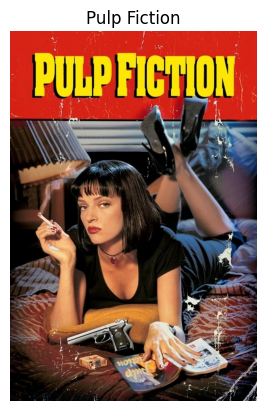

Recommendations



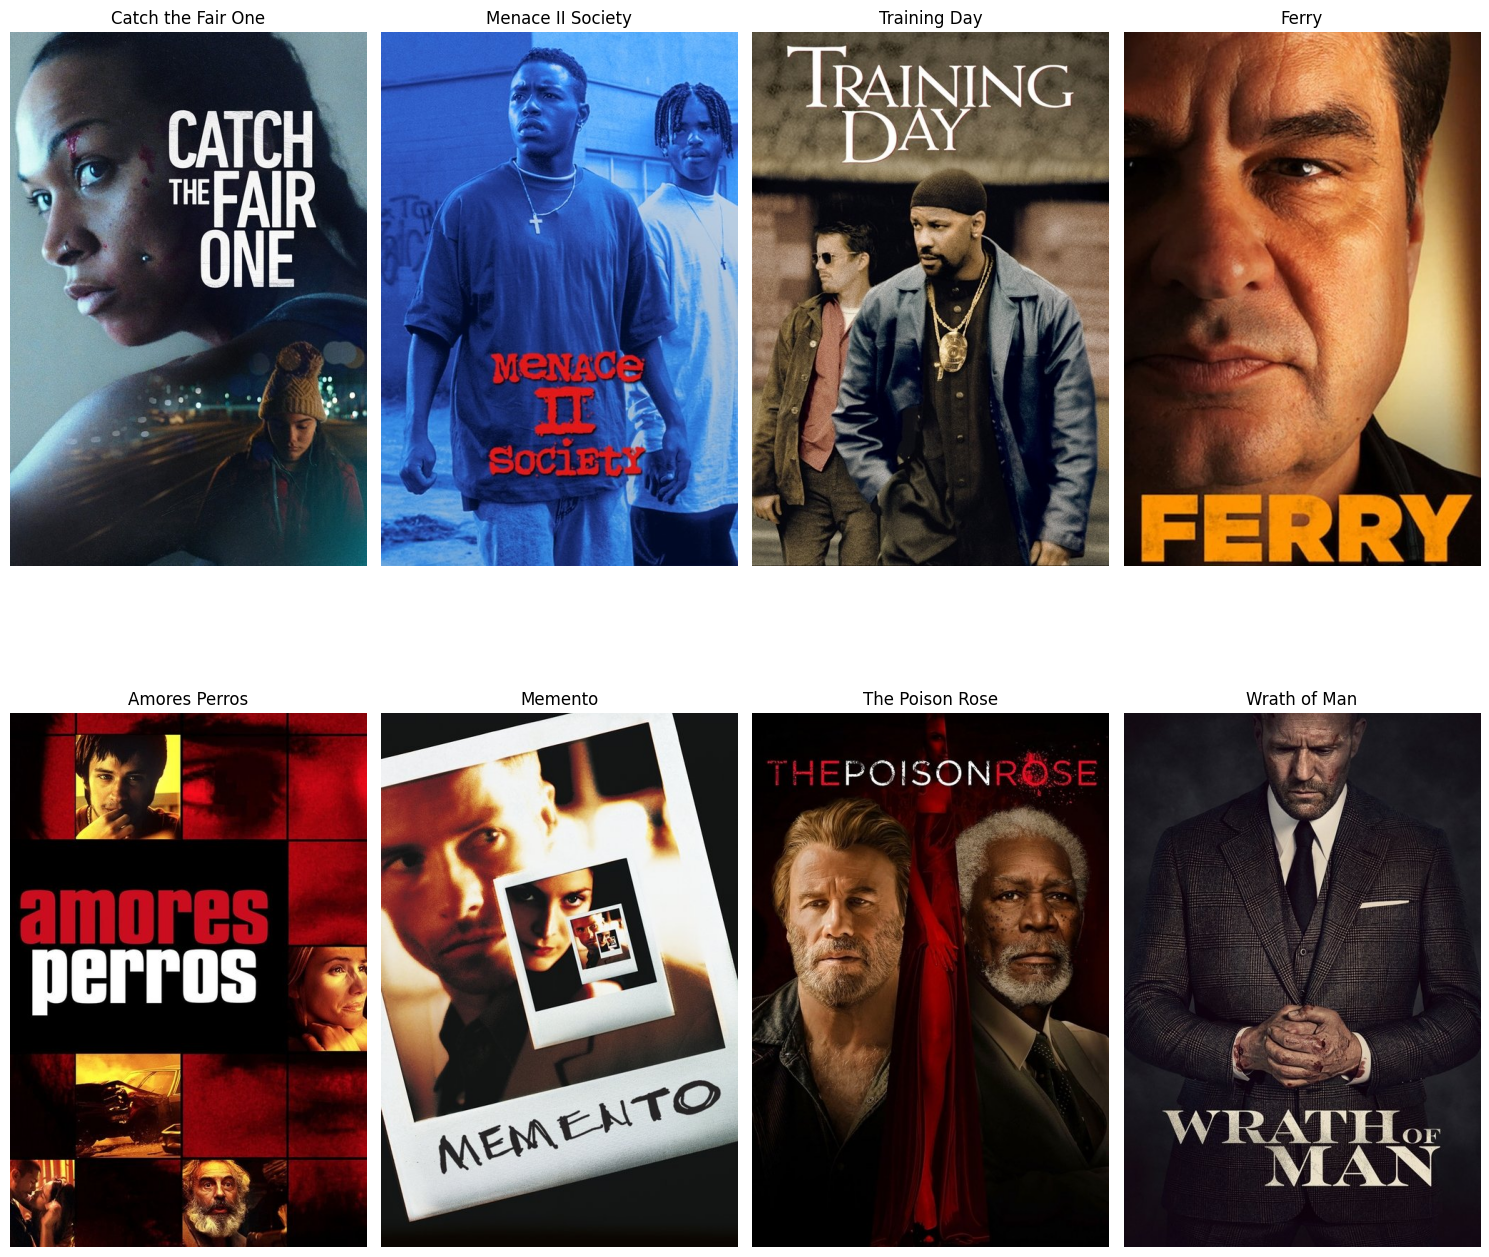

In [ ]:
get_recommendations("Pulp Fiction")